In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
df.drop(['Item_Identifier'],axis=1,inplace=True)

In [4]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4650 non-null   float64
 1   Item_Fat_Content           4650 non-null   object 
 2   Item_Visibility            4650 non-null   float64
 3   Item_Type                  4650 non-null   object 
 4   Item_MRP                   4650 non-null   float64
 5   Outlet_Identifier          4650 non-null   object 
 6   Outlet_Establishment_Year  4650 non-null   int64  
 7   Outlet_Size                4650 non-null   object 
 8   Outlet_Location_Type       4650 non-null   object 
 9   Outlet_Type                4650 non-null   object 
 10  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 435.9+ KB


In [5]:
df.replace(to_replace=['LF','Baking Goods','OUT010','High','Tier 1','Grocery Store'],value=1,inplace=True)
df.replace(to_replace=['Low Fat','Breads','OUT013','Medium','Tier 2','Supermarket Type1'],value=2,inplace=True)
df.replace(to_replace=['reg','Breakfast','OUT017','Small','Tier 3','Supermarket Type2'],value=3,inplace=True)
df.replace(to_replace=['Regular','Canned','OUT018','Supermarket Type3'],value=4,inplace=True)
df.replace(to_replace=['Dairy','OUT019','low fat'],value=5,inplace=True)
df.replace(to_replace=['Frozen Foods','OUT027'],value=6,inplace=True)
df.replace(to_replace=['Fruits and Vegetables','OUT035'],value=7,inplace=True)
df.replace(to_replace=['Hard Drinks','OUT045'],value=8,inplace=True)
df.replace(to_replace=['Health and Hygiene','OUT046'],value=9,inplace=True)
df.replace(to_replace=['Household','OUT049'],value=10,inplace=True)
df.replace(to_replace=['Meat'],value=11,inplace=True)
df.replace(to_replace=['Others'],value=12,inplace=True)
df.replace(to_replace=['Seafood'],value=13,inplace=True)
df.replace(to_replace=['Snack Foods'],value=14,inplace=True)
df.replace(to_replace=['Soft Drinks'],value=15,inplace=True)
df.replace(to_replace=['Starchy Foods'],value=16,inplace=True)

In [9]:
df['Item_Fat_Content'].value_counts()

2    2774
4    1575
1     177
3      71
5      53
Name: Item_Fat_Content, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4650 non-null   float64
 1   Item_Fat_Content           4650 non-null   int64  
 2   Item_Visibility            4650 non-null   float64
 3   Item_Type                  4650 non-null   int64  
 4   Item_MRP                   4650 non-null   float64
 5   Outlet_Identifier          4650 non-null   int64  
 6   Outlet_Establishment_Year  4650 non-null   int64  
 7   Outlet_Size                4650 non-null   int64  
 8   Outlet_Location_Type       4650 non-null   int64  
 9   Outlet_Type                4650 non-null   int64  
 10  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 435.9 KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
test.drop(['Item_Identifier'],axis=1,inplace=True)

In [8]:
test.replace(to_replace=['LF','Baking Goods','OUT010','High','Tier 1','Grocery Store'],value=1,inplace=True)
test.replace(to_replace=['Low Fat','Breads','OUT013','Medium','Tier 2','Supermarket Type1'],value=2,inplace=True)
test.replace(to_replace=['reg','Breakfast','OUT017','Small','Tier 3','Supermarket Type2'],value=3,inplace=True)
test.replace(to_replace=['Regular','Canned','OUT018','Supermarket Type3'],value=4,inplace=True)
test.replace(to_replace=['Dairy','OUT019','low fat'],value=5,inplace=True)
test.replace(to_replace=['Frozen Foods','OUT027'],value=6,inplace=True)
test.replace(to_replace=['Fruits and Vegetables','OUT035'],value=7,inplace=True)
test.replace(to_replace=['Hard Drinks','OUT045'],value=8,inplace=True)
test.replace(to_replace=['Health and Hygiene','OUT046'],value=9,inplace=True)
test.replace(to_replace=['Household','OUT049'],value=10,inplace=True)
test.replace(to_replace=['Meat'],value=11,inplace=True)
test.replace(to_replace=['Others'],value=12,inplace=True)
test.replace(to_replace=['Seafood'],value=13,inplace=True)
test.replace(to_replace=['Snack Foods'],value=14,inplace=True)
test.replace(to_replace=['Soft Drinks'],value=15,inplace=True)
test.replace(to_replace=['Starchy Foods'],value=16,inplace=True)

In [14]:
test['Item_Weight'].mean()

12.695633368756642

In [15]:
test['Outlet_Size'].mode()

0    2.0
dtype: float64

In [9]:
test['Item_Weight'].replace(np.nan,13,inplace=True)
test['Outlet_Size'].replace(np.nan,2,inplace=True)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   int64  
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   int64  
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   int64  
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   float64
 8   Outlet_Location_Type       5681 non-null   int64  
 9   Outlet_Type                5681 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 444.0 KB


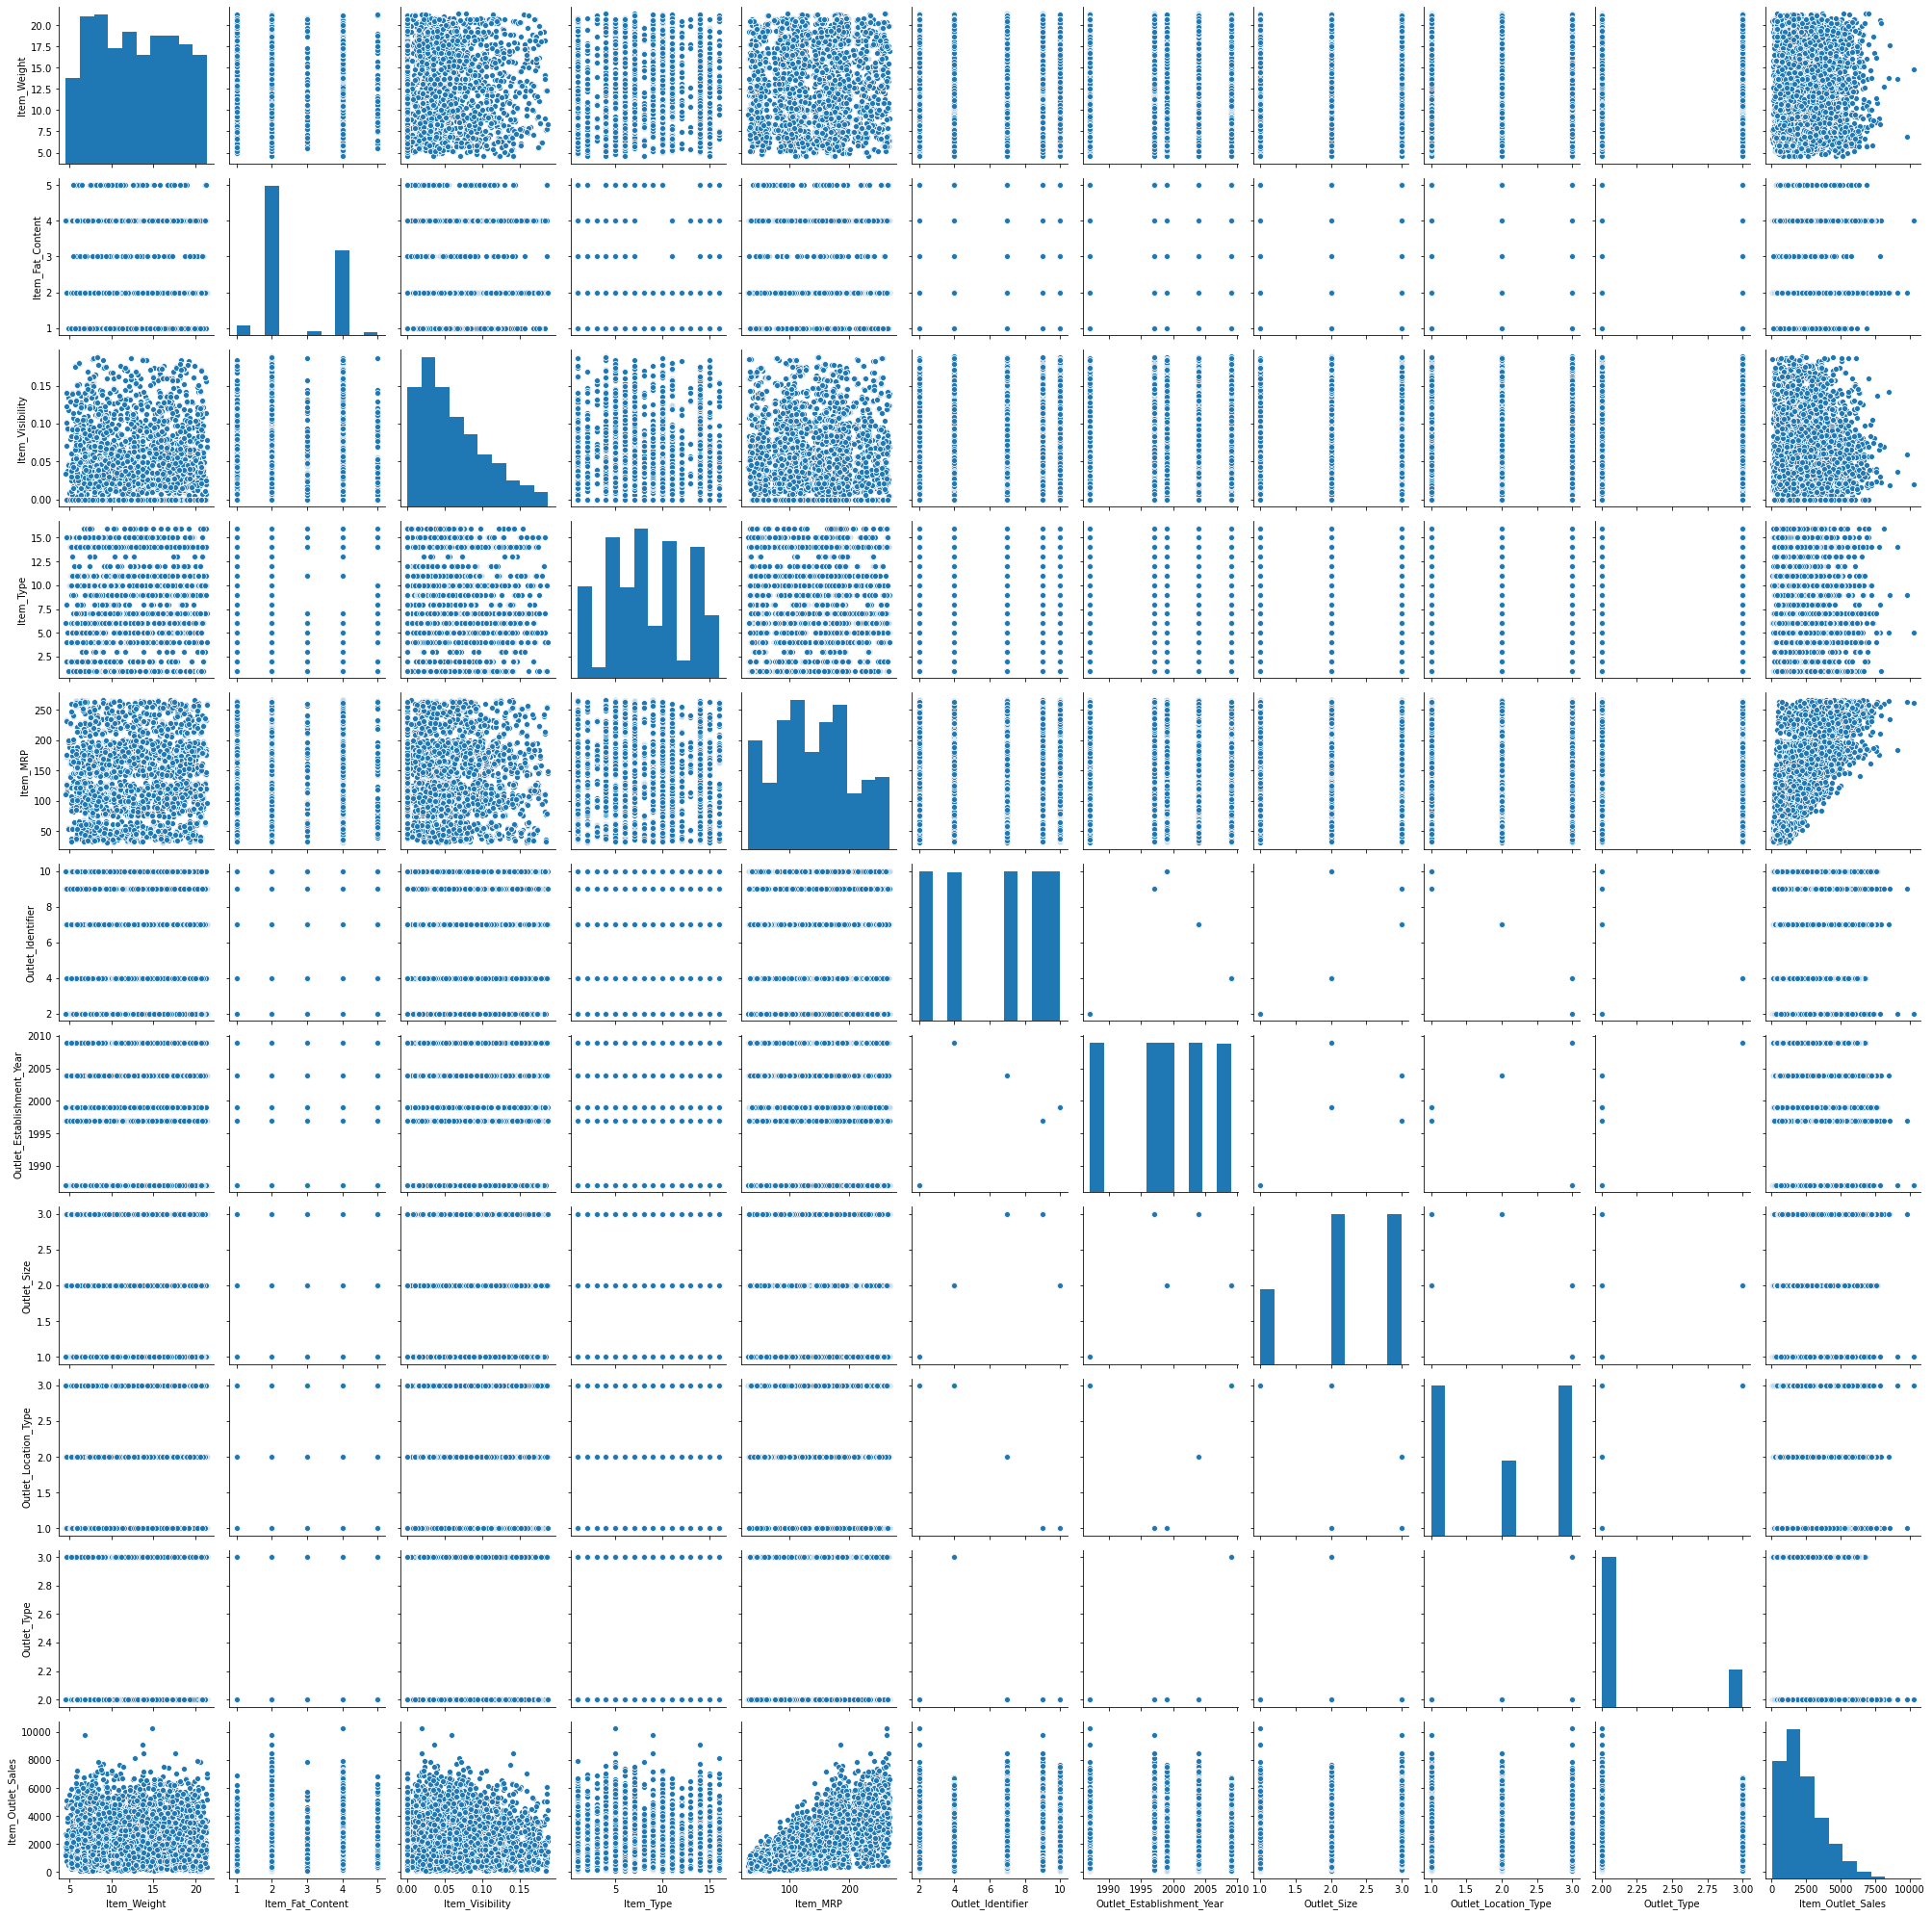

In [18]:
sns.pairplot(df)

In [11]:
X=df[['Item_MRP']].values
y=df['Item_Outlet_Sales'].values

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [13]:
lin_reg=LinearRegression(fit_intercept=True)

In [14]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [15]:
print('Linear Model Coeff m:{}'.format(lin_reg.coef_))
print('Linear Model Intercept c: {}'.format(lin_reg.intercept_))

Linear Model Coeff m:[16.07466833]
Linear Model Intercept c: -18.754686358574872


In [16]:
y_predict=lin_reg.predict(X_test)

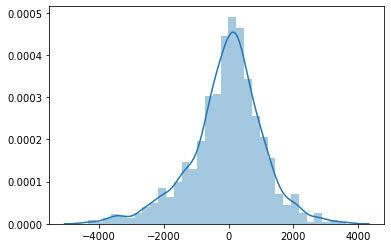

In [25]:
sns.distplot((y_predict-y_test))

In [26]:
y_predict

array([2549.80692202, 3333.24767744, 3951.37011385, 2902.98988987,
        849.71463469, 1784.04830177, 3145.97457641, 3598.69510552,
       4070.15548297, 3106.88741289, 3137.93724224, 4042.32058728,
       2794.3990754 ,  928.43871539, 1355.94773468, 3137.93724224,
       2673.45648578, 1929.06109975, 2626.37378223, 2981.12242277,
       4221.55635415,  544.16412405, 3003.07720478, 2928.20139968,
       1779.2676954 ,  604.14835641, 4076.5853503 , 1623.00262959,
       1763.23482121, 1557.72983135,  563.49552019, 4198.5856531 ,
        965.32686428,  926.2814949 , 3109.59438704,  616.45833742,
       1222.73695819, 2843.08924578, 1391.31200502, 2255.55047336,
       3973.28310172,  894.13215823,  832.07429366, 2880.06098295,
       2931.96608701, 1851.01215511, 2609.24140072, 3575.13285667,
       1721.99043719, 2229.28125036, 4075.48584299, 1638.52754427,
       1657.77535213,  766.84328955,  666.16442684, 3422.67427232,
       2418.71157188, 2517.23321411, 2073.05797869, 1602.10556

In [27]:
y_test

array([1294.3152, 3145.905 , 5896.3248, 1102.5648,  447.4176, 1252.3698,
       2561.9984, 4950.8888, 5580.7356, 5089.3752, 2167.8448, 3532.7348,
       1926.1594,  926.7936, 1744.396 , 4138.6128, 3691.1952, 2093.941 ,
       2137.8838, 1884.214 , 5564.7564,  585.904 , 2458.1336, 2006.7212,
       1677.816 ,  759.012 , 5834.4054,  615.1992, 1977.426 , 1076.5986,
        346.216 , 4448.2098,  433.4358,  585.904 , 1166.4816,  926.7936,
        231.6984, 1605.9096, 1831.6158, 1404.838 , 6208.585 , 1113.2176,
        647.1576, 1427.4752, 4725.8484, 1259.6936, 4586.0304, 3589.9936,
       2293.0152, 1411.496 , 3570.0196,  309.597 , 1998.7316,  425.4462,
        133.8258, 1486.7314, 1990.742 , 2659.871 , 1038.648 , 1537.998 ,
        938.778 , 3062.0142, 4278.4308,  199.74  , 1374.2112, 1240.3854,
       1155.8288, 6331.758 , 2802.3522, 2490.092 , 4097.3332,  377.5086,
       2956.152 ,  978.726 , 3313.6866, 2530.7058, 1158.492 , 1406.1696,
       3306.3628, 3430.2016,  373.5138, 3795.06  , 

In [13]:
n=len(X_test)
n

930

In [14]:
k=X_test.shape[1]
k

1

In [19]:
r2=r2_score(y_test, y_predict)
r2

0.4659618641335189

In [20]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.4653863920043524

In [21]:
mean_absolute_error(y_test, y_predict)

829.8280382381628

In [32]:
y_predict=lin_reg.predict(test[['Item_MRP']])

In [33]:
y_predict

array([1715.09440448, 1384.88213768, 3867.35746726, ..., 1890.01573036,
       3431.21956601, 1263.93954807])

In [34]:
y_predict.shape

(5681,)

In [35]:
predict=pd.DataFrame(data=y_predict)

In [36]:
predict.to_csv('solution1.csv',index=False)

In [11]:
import xgboost as xgb

In [12]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [13]:
model = xgb.XGBClassifier()

In [14]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_predict=model.predict(X_test)

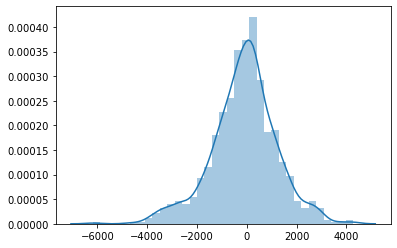

In [17]:
sns.distplot((y_predict-y_test))

In [18]:
n=len(X_test)
n

930

In [19]:
k=X_test.shape[1]
k

1

In [20]:
r2=r2_score(y_test, y_predict)
r2

0.25648044504025136

In [21]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.2556792386232689

In [39]:
test=pd.read_csv('test.csv')

In [40]:
test=test[['Item_MRP']].astype('int').values

In [41]:
test

array([[107],
       [ 87],
       [241],
       ...,
       [118],
       [214],
       [ 79]])

In [42]:
y_predict=model.predict(test)

In [43]:
y_predict

array([ 982.7208, 1494.0552, 5287.7836, ..., 2607.2728, 4274.436 ,
       1438.128 ])

In [44]:
y_predict.shape

(5681,)

In [45]:
predict=pd.DataFrame(data=y_predict)

In [46]:
predict.to_csv('solution2.csv',index=False)

In [13]:
dl = Sequential()
dl.add(Dense(10, activation='relu'))
dl.add(Dense(10, activation='relu'))
dl.add(Dense(10, activation='relu'))
dl.add(Dense(10, activation='relu'))
dl.add(Dense(1))
dl.compile(optimizer='adam', loss='mse')

In [14]:
dl.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=400, batch_size=128)

Train on 3720 samples, validate on 930 samples
Epoch 1/400
3720/3720 [==============================] - 2s 414us/sample - loss: 7208945.2430 - val_loss: 7614498.1000
Epoch 2/400
3720/3720 [==============================] - 0s 27us/sample - loss: 7058806.5892 - val_loss: 7371416.6796
Epoch 3/400
3720/3720 [==============================] - 0s 28us/sample - loss: 6705647.7656 - val_loss: 6840123.9108
Epoch 4/400
3720/3720 [==============================] - 0s 27us/sample - loss: 5984269.7097 - val_loss: 5800163.9484
Epoch 5/400
3720/3720 [==============================] - 0s 27us/sample - loss: 4676104.3978 - val_loss: 4089375.4720
Epoch 6/400
3720/3720 [==============================] - 0s 27us/sample - loss: 2882452.9140 - val_loss: 2204803.8089
Epoch 7/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1514451.4288 - val_loss: 1329069.8798
Epoch 8/400
3720/3720 [==============================] - 0s 28us/sample - loss: 1205704.3465 - val_loss: 1262229.5179
Epoch 9/

3720/3720 [==============================] - 0s 37us/sample - loss: 1195005.4892 - val_loss: 1269961.2172
Epoch 70/400
3720/3720 [==============================] - 0s 34us/sample - loss: 1198024.0247 - val_loss: 1260643.9497
Epoch 71/400
3720/3720 [==============================] - 0s 29us/sample - loss: 1197530.2958 - val_loss: 1269995.6836
Epoch 72/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194417.7774 - val_loss: 1261588.6003
Epoch 73/400
3720/3720 [==============================] - 0s 28us/sample - loss: 1194602.1414 - val_loss: 1263090.4923
Epoch 74/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1198974.7465 - val_loss: 1272818.5208
Epoch 75/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194318.3741 - val_loss: 1262187.1108
Epoch 76/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194588.9331 - val_loss: 1263970.0380
Epoch 77/400
3720/3720 [==============================] - 0s 

3720/3720 [==============================] - 0s 25us/sample - loss: 1195312.7102 - val_loss: 1271297.5914
Epoch 138/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194618.4220 - val_loss: 1267135.5192
Epoch 139/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1195062.3640 - val_loss: 1266518.0042
Epoch 140/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1195039.4712 - val_loss: 1265981.9473
Epoch 141/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194408.0306 - val_loss: 1269514.7237
Epoch 142/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1195120.8468 - val_loss: 1266824.5827
Epoch 143/400
3720/3720 [==============================] - 0s 28us/sample - loss: 1194149.5301 - val_loss: 1262223.3624
Epoch 144/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1197658.6255 - val_loss: 1277679.7379
Epoch 145/400
3720/3720 [=============================

3720/3720 [==============================] - 0s 26us/sample - loss: 1194351.6813 - val_loss: 1265159.8300
Epoch 206/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194424.6763 - val_loss: 1265258.5612
Epoch 207/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1195611.4753 - val_loss: 1262961.8969
Epoch 208/400
3720/3720 [==============================] - 0s 28us/sample - loss: 1194196.9250 - val_loss: 1261963.2585
Epoch 209/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194831.3798 - val_loss: 1266814.8219
Epoch 210/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194404.9040 - val_loss: 1263908.9398
Epoch 211/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1198374.8425 - val_loss: 1269579.5196
Epoch 212/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1197773.5944 - val_loss: 1278841.4644
Epoch 213/400
3720/3720 [=============================

3720/3720 [==============================] - 0s 26us/sample - loss: 1194014.6122 - val_loss: 1262512.8418
Epoch 274/400
3720/3720 [==============================] - 0s 25us/sample - loss: 1194388.5921 - val_loss: 1262230.6421
Epoch 275/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194623.6195 - val_loss: 1266322.3109
Epoch 276/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194271.0882 - val_loss: 1261101.1082
Epoch 277/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1195015.9288 - val_loss: 1269455.3988
Epoch 278/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194150.0526 - val_loss: 1263526.8222
Epoch 279/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194348.0038 - val_loss: 1262595.0618
Epoch 280/400
3720/3720 [==============================] - 0s 25us/sample - loss: 1193640.8108 - val_loss: 1271616.7203
Epoch 281/400
3720/3720 [=============================

3720/3720 [==============================] - 0s 26us/sample - loss: 1197860.9677 - val_loss: 1266309.0551
Epoch 342/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1196052.3430 - val_loss: 1272147.3862
Epoch 343/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1195802.6901 - val_loss: 1259866.8172
Epoch 344/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1196457.5513 - val_loss: 1266554.0535
Epoch 345/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194485.2786 - val_loss: 1267975.3500
Epoch 346/400
3720/3720 [==============================] - 0s 27us/sample - loss: 1194802.9737 - val_loss: 1260857.0988
Epoch 347/400
3720/3720 [==============================] - 0s 26us/sample - loss: 1194562.3008 - val_loss: 1267983.0198
Epoch 348/400
3720/3720 [==============================] - 0s 28us/sample - loss: 1195007.5113 - val_loss: 1264141.5218
Epoch 349/400
3720/3720 [=============================

In [15]:
y_predict = dl.predict(X_test)

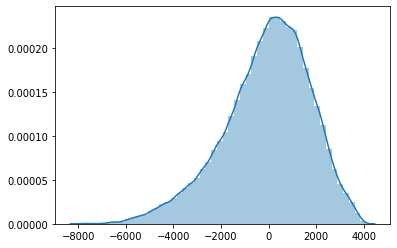

In [16]:
sns.distplot((y_predict-y_test))

In [20]:
r2=r2_score(y_test, y_predict)
r2

0.46408568202280887

In [21]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.4635081881456783

In [17]:
mean_absolute_error(y_test, y_predict)

830.2983260858219